In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as npl
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
#%matplotlib inline
from matplotlib import style
from sklearn.feature_selection import RFE
import csv

# Classification model baselining

In [2]:
path = "/Users/pritigirishvankudre/Day7_BasicML/diabetese/diabetes.csv"

d_data = pd.read_csv(path)
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
d_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Check unique values for each column

#weather_data_samp.nunique()
col_uniq = pd.DataFrame(d_data.nunique()).reset_index()
col_uniq.columns = ['columns','unique_cnt']
col_uniq['unique_pct'] = round(col_uniq['unique_cnt']/len(d_data)*100,2)
col_uniq

,columns,unique_cnt,unique_pct
0,Pregnancies,17,2.21
1,Glucose,136,17.71
2,BloodPressure,47,6.12
3,SkinThickness,51,6.64
4,Insulin,186,24.22
5,BMI,248,32.29
6,DiabetesPedigreeFunction,517,67.32
7,Age,52,6.77
8,Outcome,2,0.26


In [5]:
# Columns
# Pregnancies Number of times pregnant ==> done
# Glucose Plasma glucose concentration a 2 hours in an oral glucose tolerance test ==> done
# Insulin 2-Hour serum insulin (mu U/ml) ==> done
# Age Age (years) ==> done
# BloodPressure Diastolic blood pressure (mm Hg) ==> done
# SkinThickness Triceps skin fold thickness (mm) ==> done
# BMI Body mass index (weight in kg/(height in m)^2) ==> done
# DiabetesPedigreeFunction Diabetes pedigree function ==> done


# Outcome Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Since no null values and all columns as numeric, basic pre processing skipped for now

# EDA

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# Replacing Outcome with No and Yes as category for visualization convenience.
data = d_data.copy()
data['Outcome'].replace(0,'No',inplace=True)
data['Outcome'].replace(1,'Yes',inplace=True)

# No of times Pregnancy and diabetese

1. Checking with Pregnancy column and its trend with diabetese outcome.

<IPython.core.display.Javascript object>


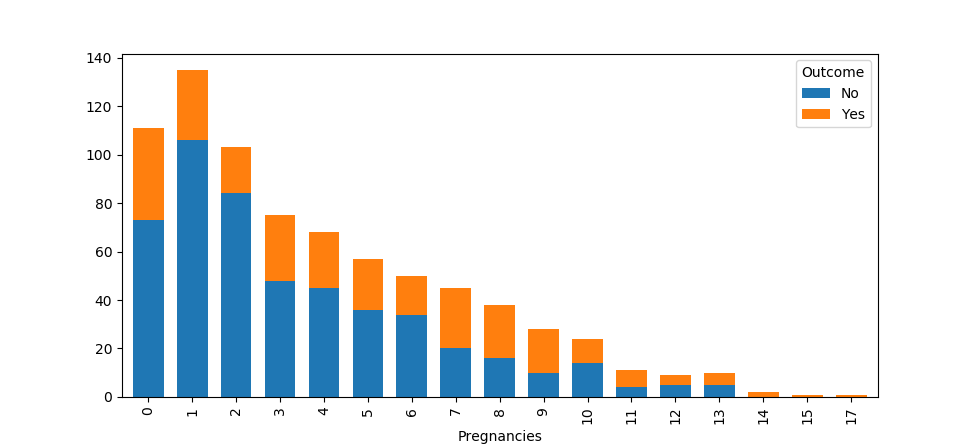

In [8]:
%matplotlib notebook
data.groupby(['Pregnancies','Outcome']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

==> Basis data visulaization, with number of pregnancy are less there seems relative less cases of diabetese and with increase in pregnancy times seems fairly increase in diabetese outcomes.

# Age and diabetese

2. Analysis for Age

<IPython.core.display.Javascript object>


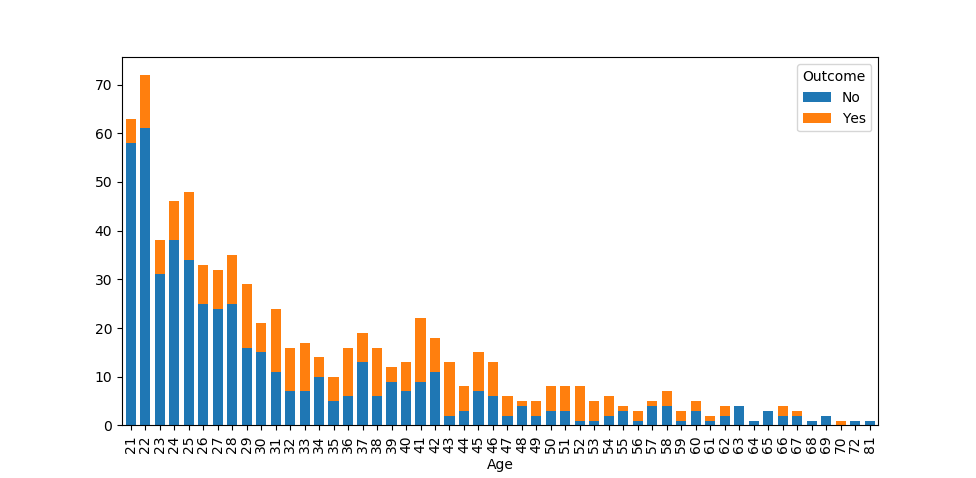

In [9]:
%matplotlib notebook
data.groupby(['Age','Outcome']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

==> Basis data visualization, even though there is a range of age available there is no much variation observed with increase in age. So as part of feature engineering while building model, I can use Q-cut to group this column and see impact on results.

# No of times Pregnancy and Age

3. Relation between Age and Pregnancy

<IPython.core.display.Javascript object>


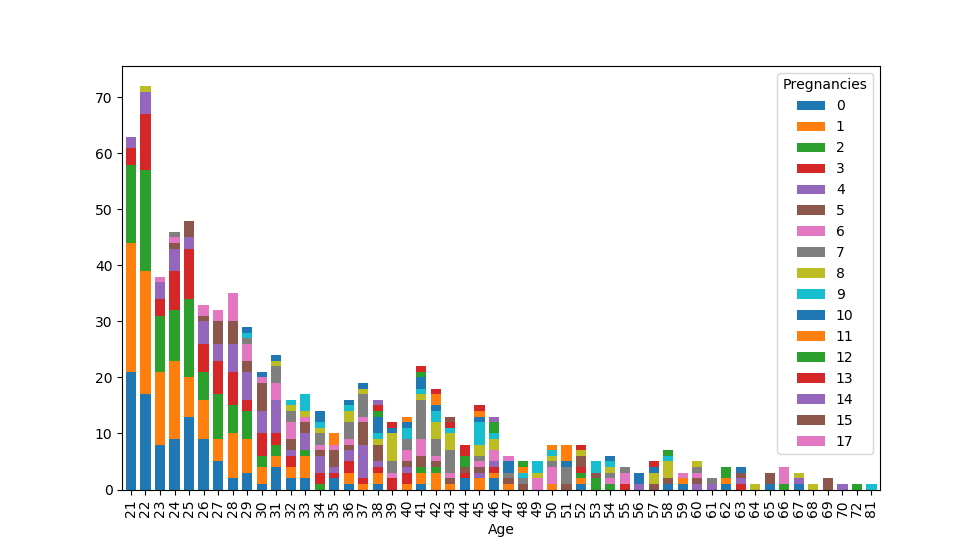

In [10]:
%matplotlib notebook
data.groupby(['Age','Pregnancies']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

==> Basis data visualization, it seems Age is a current entity recorded. As we could also see that 0 times pregnancy is distributed during early ages but there are ceses of high number of times pregnancy occurred.

# Analysis of Glucose column

4. Analysis for Glucose

In [11]:
print (np.sort(data['Glucose'].unique()))

[  0  44  56  57  61  62  65  67  68  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 186 187 188
 189 190 191 193 194 195 196 197 198 199]


In [12]:
a = data[['Glucose','Outcome','Pregnancies']]
a['G_grp'] = pd.cut(x=a['Glucose'],bins=[0,70,140,200],labels=['low','medium','high'])
a.drop('Glucose',axis=1,inplace=True)
a.groupby(['G_grp','Outcome'])['Outcome','Pregnancies'].count()

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Outcome  Pregnancies
G_grp  Outcome                      
low    No          11.0         11.0
       Yes          NaN          NaN
medium No         426.0        426.0
       Yes        134.0        134.0
high   No          60.0         60.0
       Yes        132.0        132.0

<IPython.core.display.Javascript object>


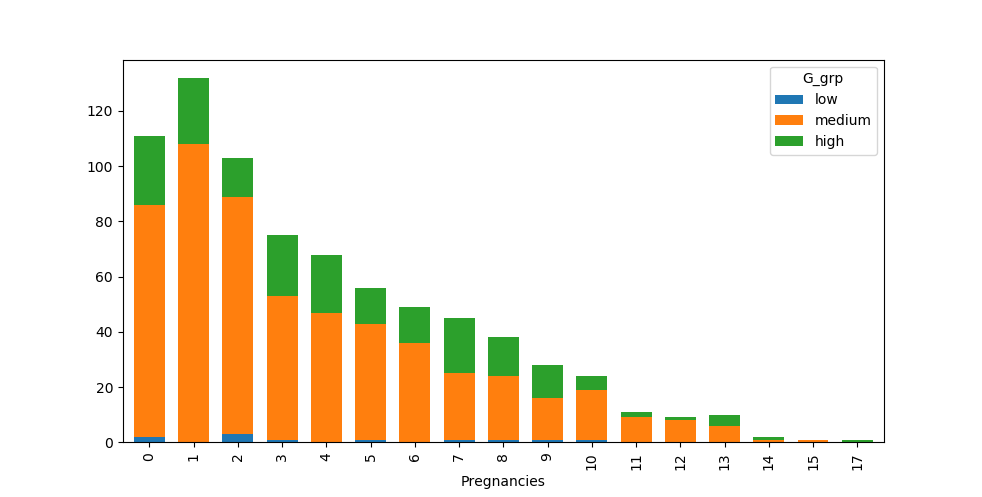

In [13]:
%matplotlib notebook
a.groupby(['Pregnancies','G_grp']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

<IPython.core.display.Javascript object>


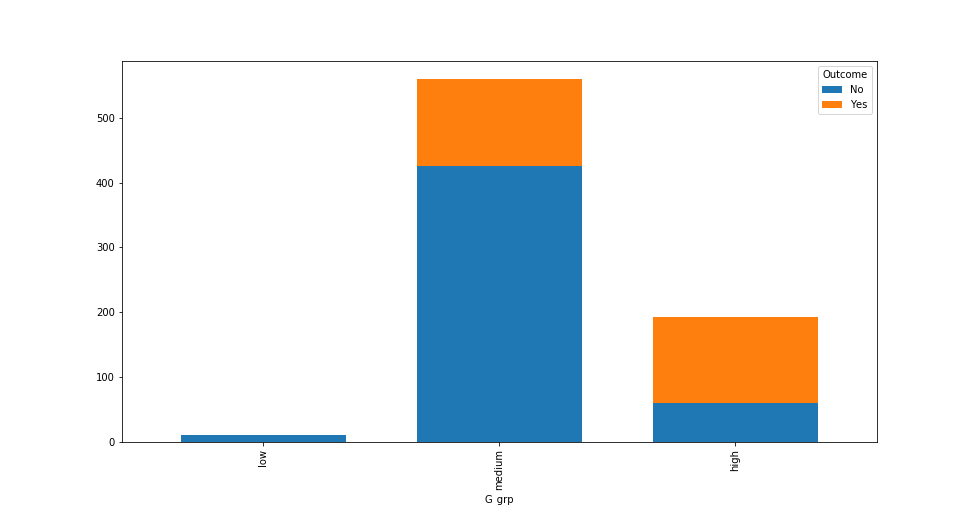

In [114]:
%matplotlib notebook
a.groupby(['G_grp','Outcome']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

==> Basis data visualization, it seems with increase in Glucose level, Diabetese Outcome as Yes increases and Diabetese Outcome as No decreases. Also in High Glucose group, chances that a prgenant woman having diabetese seems more. There are some records with value recorded as 0, which can be replaced with a random value from middle range of Glucose.

# Analysis of Insulin column

5. Analysis for Insulin

In [14]:
print (np.sort(data['Insulin'].unique()))

[  0  14  15  16  18  22  23  25  29  32  36  37  38  40  41  42  43  44
  45  46  48  49  50  51  52  53  54  55  56  57  58  59  60  61  63  64
  65  66  67  68  70  71  72  73  74  75  76  77  78  79  81  82  83  84
  85  86  87  88  89  90  91  92  94  95  96  99 100 105 106 108 110 112
 114 115 116 119 120 122 125 126 127 128 129 130 132 135 140 142 144 145
 146 148 150 152 155 156 158 159 160 165 166 167 168 170 171 175 176 178
 180 182 183 184 185 188 190 191 192 193 194 196 200 204 205 207 210 215
 220 225 228 230 231 235 237 240 245 249 250 255 258 265 270 271 272 274
 275 277 278 280 284 285 291 293 300 304 310 318 321 325 326 328 330 335
 342 360 370 375 387 392 402 415 440 465 474 478 480 485 495 510 540 543
 545 579 600 680 744 846]


In [15]:
b = data[['Insulin','Outcome','Pregnancies']]
b['I_grp'] = pd.cut(x=b['Insulin'],bins=3,labels=['low','medium','high'])
b.drop('Insulin',axis=1,inplace=True)
b.groupby(['I_grp','Outcome'])['Outcome','Pregnancies'].count()

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Outcome  Pregnancies
I_grp  Outcome                      
low    No           480          480
       Yes          244          244
medium No            18           18
       Yes           21           21
high   No             2            2
       Yes            3            3

<IPython.core.display.Javascript object>


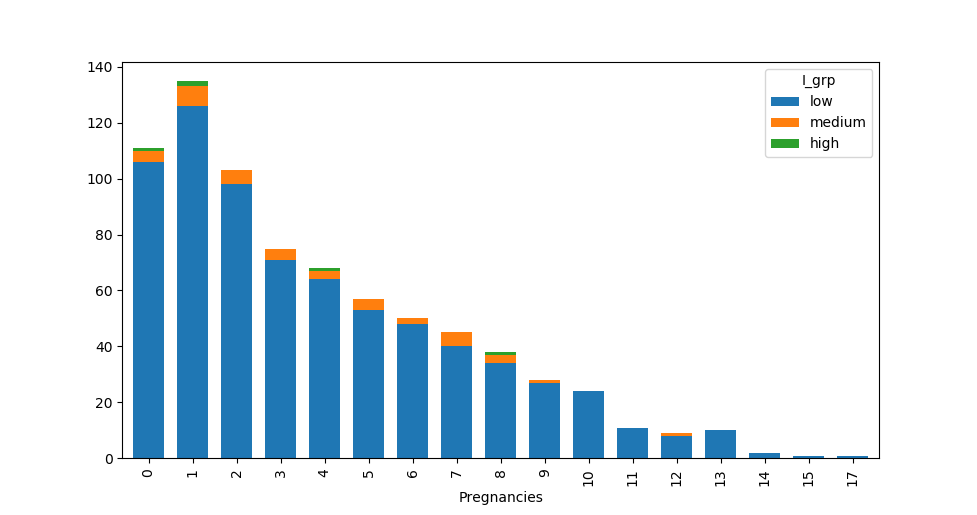

In [16]:
%matplotlib notebook
b.groupby(['Pregnancies','I_grp']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

<IPython.core.display.Javascript object>


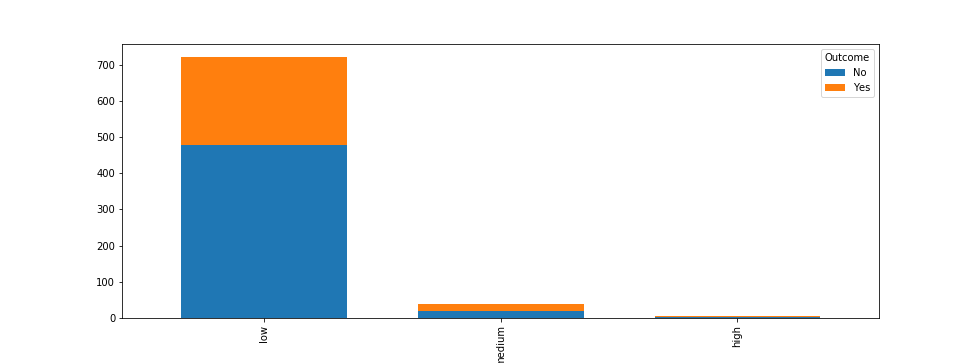

In [56]:
%matplotlib notebook
b.groupby(['I_grp','Outcome']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

<IPython.core.display.Javascript object>


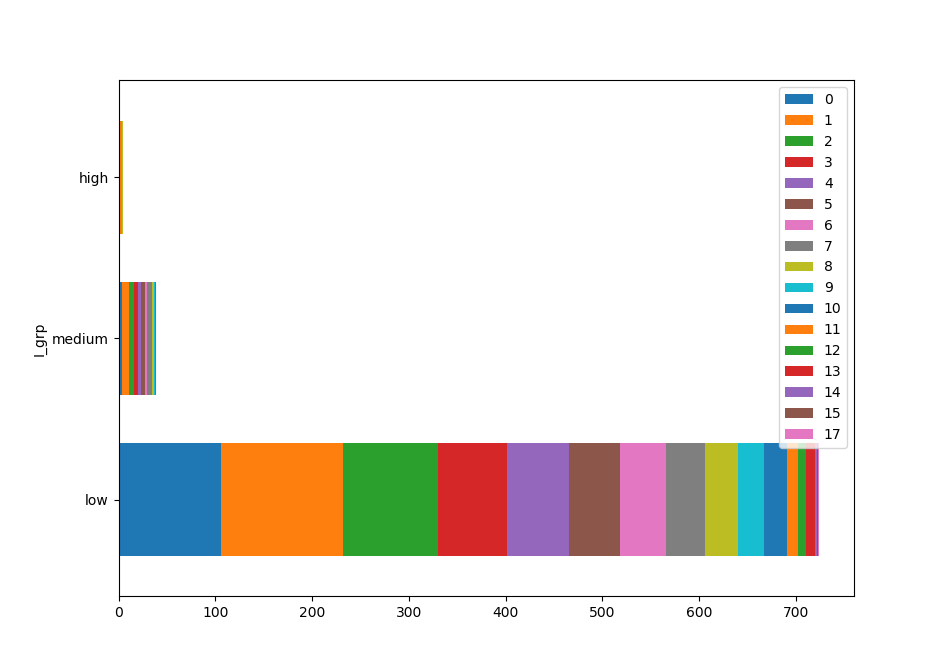

In [17]:
%matplotlib notebook
b.groupby(['I_grp','Pregnancies']).size().unstack().plot(kind='barh',stacked=True, width=0.7, legend=False)
plt.legend(loc='upper right')
plt.show()

==> Basis data visualization, a low insulin value seems to be associated with most of pregnancies and diabetese cases. Also with low insulin when number of pregnancies increases, it seems women are more prone to diabetese. There are some records with value recorded as 0, which can be replaced with a random value from low range of Insulin.

# Analysis of Blood Pressure column

6. Analysis for Blood Pressure

In [18]:
print (np.sort(data['BloodPressure'].unique()))

[  0  24  30  38  40  44  46  48  50  52  54  55  56  58  60  61  62  64
  65  66  68  70  72  74  75  76  78  80  82  84  85  86  88  90  92  94
  95  96  98 100 102 104 106 108 110 114 122]


<IPython.core.display.Javascript object>


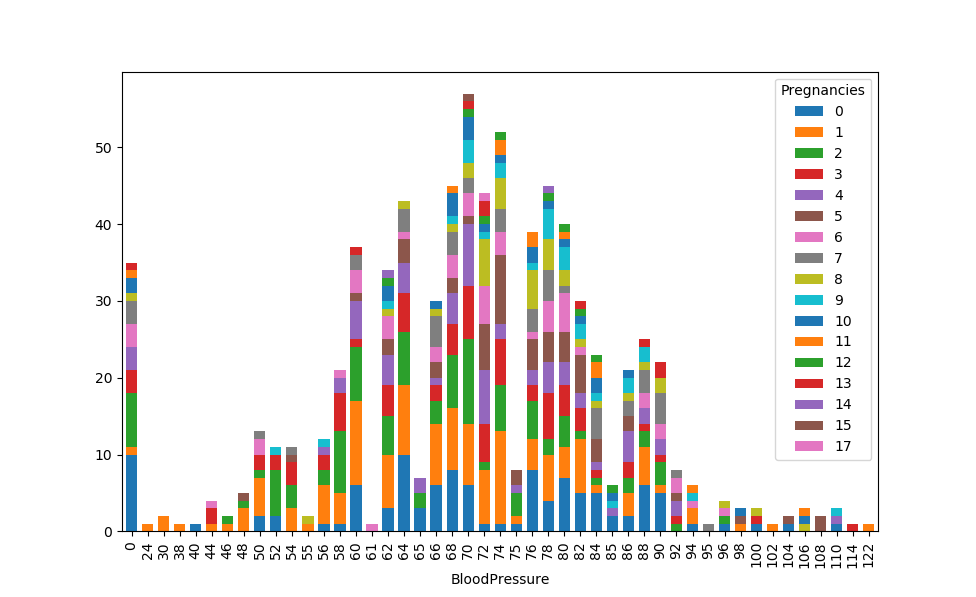

In [19]:
%matplotlib notebook
data.groupby(['BloodPressure','Pregnancies']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

<IPython.core.display.Javascript object>


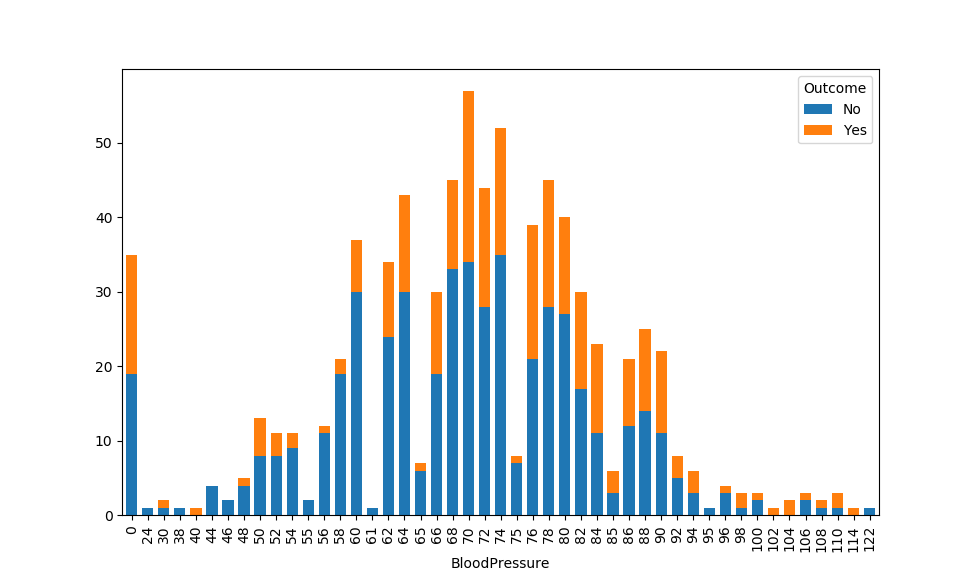

In [20]:
%matplotlib notebook
data.groupby(['BloodPressure','Outcome']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

==> Basis data visualization, blood pressure value seems to follow normal curve over pregnancies and diabetese outcome. There are some records with value recorded as 0, which can be replaced with a random value between middle range of blood pressure.

# Analysis of Skin Thickness column

7. Analysis of Skin Thickness

In [21]:
print (np.sort(data['SkinThickness'].unique()))

[ 0  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 54 56
 60 63 99]


<IPython.core.display.Javascript object>


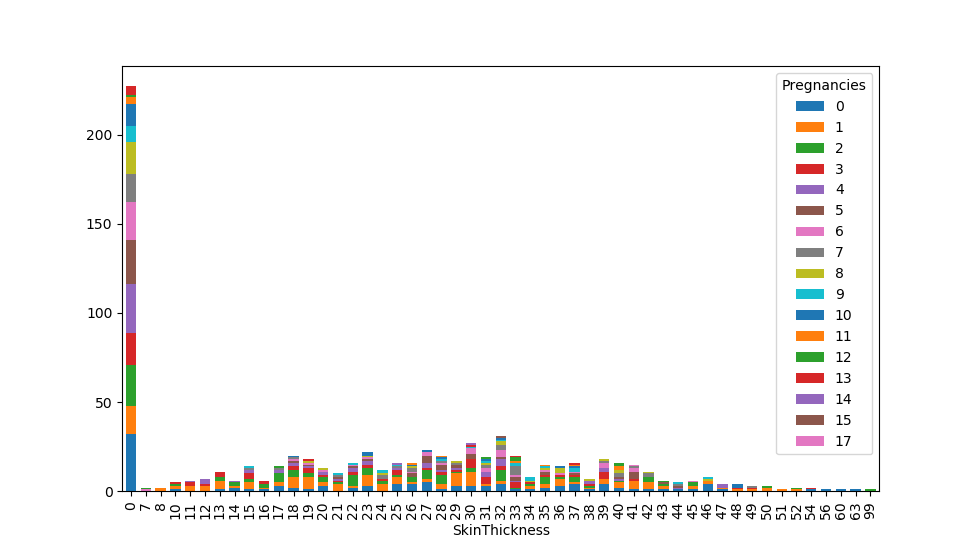

In [22]:
%matplotlib notebook
data.groupby(['SkinThickness','Pregnancies']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

<IPython.core.display.Javascript object>


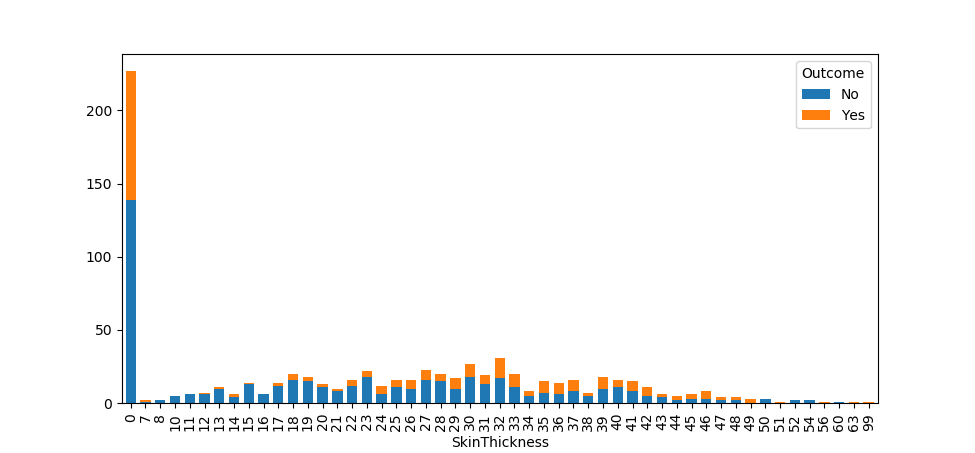

In [23]:
%matplotlib notebook
data.groupby(['SkinThickness','Outcome']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

==> Basis data visualization, most of the records have skin thickness value recorded as 0. Might not play a significant role for predicting diabetese. Will drop this field in feature selection.

# Analysis of BMI column

8. Analysis of BMI

In [24]:
print (np.sort(data['BMI'].unique()))

[ 0.  18.2 18.4 19.1 19.3 19.4 19.5 19.6 19.9 20.  20.1 20.4 20.8 21.
 21.1 21.2 21.7 21.8 21.9 22.1 22.2 22.3 22.4 22.5 22.6 22.7 22.9 23.
 23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1 24.2 24.3 24.4
 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4 25.5 25.6 25.8 25.9
 26.  26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9 27.  27.1 27.2 27.3
 27.4 27.5 27.6 27.7 27.8 27.9 28.  28.1 28.2 28.3 28.4 28.5 28.6 28.7
 28.8 28.9 29.  29.2 29.3 29.5 29.6 29.7 29.8 29.9 30.  30.1 30.2 30.3
 30.4 30.5 30.7 30.8 30.9 31.  31.1 31.2 31.3 31.6 31.9 32.  32.1 32.2
 32.3 32.4 32.5 32.6 32.7 32.8 32.9 33.1 33.2 33.3 33.5 33.6 33.7 33.8
 33.9 34.  34.1 34.2 34.3 34.4 34.5 34.6 34.7 34.8 34.9 35.  35.1 35.2
 35.3 35.4 35.5 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3 36.4 36.5 36.6
 36.7 36.8 36.9 37.  37.1 37.2 37.3 37.4 37.5 37.6 37.7 37.8 37.9 38.
 38.1 38.2 38.3 38.4 38.5 38.6 38.7 38.8 38.9 39.  39.1 39.2 39.3 39.4
 39.5 39.6 39.7 39.8 39.9 40.  40.1 40.2 40.5 40.6 40.7 40.8 40.9 41.
 41.2 41.3

In [26]:
c = data[['BMI','Outcome','Pregnancies']]
c['BMI_grp'] = pd.cut(x=c['BMI'],bins=[0,18.5,22.9,70],labels=['Underweight','Normal','Overweight'])
c.drop('BMI',axis=1,inplace=True)
c.groupby(['BMI_grp','Outcome'])['Outcome','Pregnancies'].count()

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Outcome  Pregnancies
BMI_grp     Outcome                      
Underweight No           4.0          4.0
            Yes          NaN          NaN
Normal      No          45.0         45.0
            Yes          1.0          1.0
Overweight  No         442.0        442.0
            Yes        265.0        265.0

<IPython.core.display.Javascript object>


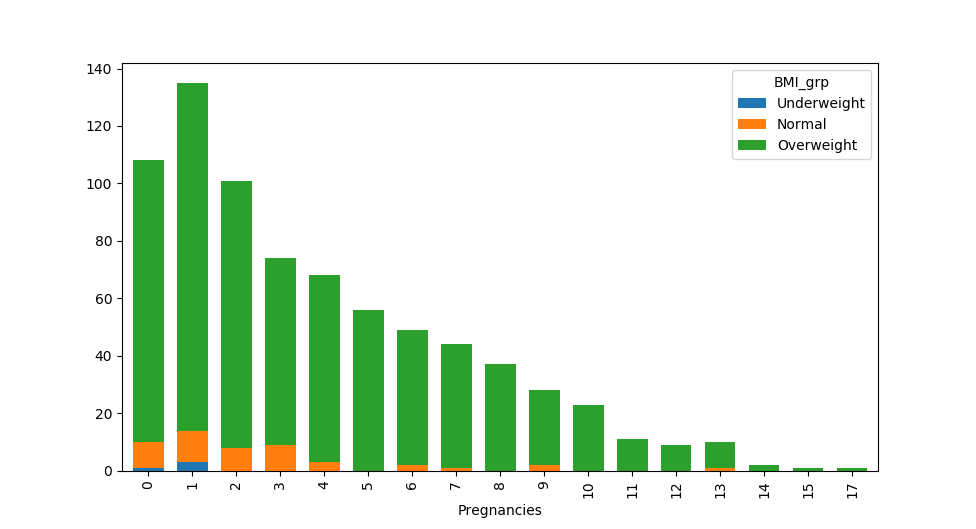

In [27]:
%matplotlib notebook
c.groupby(['Pregnancies','BMI_grp']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

<IPython.core.display.Javascript object>


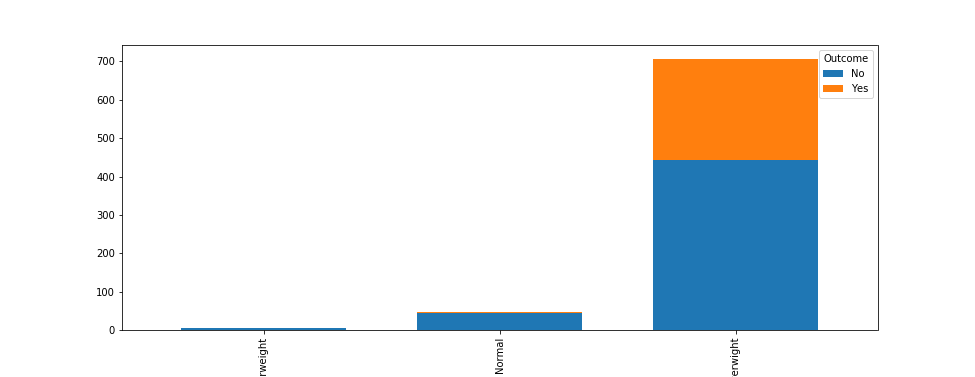

In [115]:
%matplotlib notebook
c.groupby(['BMI_grp','Outcome']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

==> Basis Data visualization, most of the records fall under high BMI value (this might be because data is for pregnant women). There are some records with value recorded as 0, which can be replaced with a random value between high range of BMI.

# Analysis of DiabetesPedigreeFunction column

9. Analysis of Diabetese Pedigree Function

In [28]:
print (np.sort(data['DiabetesPedigreeFunction'].unique()))

[0.078 0.084 0.085 0.088 0.089 0.092 0.096 0.1   0.101 0.102 0.107 0.108
 0.115 0.118 0.121 0.122 0.123 0.126 0.127 0.128 0.129 0.13  0.133 0.134
 0.135 0.136 0.137 0.138 0.14  0.141 0.142 0.143 0.144 0.145 0.147 0.148
 0.149 0.15  0.151 0.153 0.154 0.155 0.156 0.157 0.158 0.159 0.16  0.161
 0.162 0.163 0.164 0.165 0.166 0.167 0.17  0.171 0.173 0.174 0.175 0.176
 0.177 0.178 0.179 0.18  0.181 0.182 0.183 0.186 0.187 0.188 0.189 0.19
 0.191 0.192 0.194 0.196 0.197 0.198 0.199 0.2   0.201 0.203 0.204 0.205
 0.206 0.207 0.209 0.21  0.212 0.215 0.217 0.218 0.219 0.22  0.221 0.222
 0.223 0.225 0.226 0.227 0.229 0.23  0.231 0.232 0.233 0.234 0.235 0.236
 0.237 0.238 0.239 0.24  0.241 0.243 0.244 0.245 0.246 0.247 0.248 0.249
 0.251 0.252 0.253 0.254 0.255 0.256 0.257 0.258 0.259 0.26  0.261 0.262
 0.263 0.264 0.265 0.267 0.268 0.269 0.27  0.271 0.272 0.277 0.278 0.279
 0.28  0.282 0.283 0.284 0.285 0.286 0.287 0.289 0.29  0.292 0.293 0.294
 0.295 0.296 0.297 0.299 0.3   0.302 0.303 0.304 0.3

In [29]:
d = data[['DiabetesPedigreeFunction','Outcome','Pregnancies']]
d['DPF_grp'] = pd.cut(x=d['DiabetesPedigreeFunction'],bins=3,labels=['Function1','Function2','Function3'])
d.drop('DiabetesPedigreeFunction',axis=1,inplace=True)
d.groupby(['DPF_grp','Outcome'])['Outcome','Pregnancies'].count()

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Outcome  Pregnancies
DPF_grp   Outcome                      
Function1 No           461          461
          Yes          224          224
Function2 No            34           34
          Yes           40           40
Function3 No             5            5
          Yes            4            4

<IPython.core.display.Javascript object>


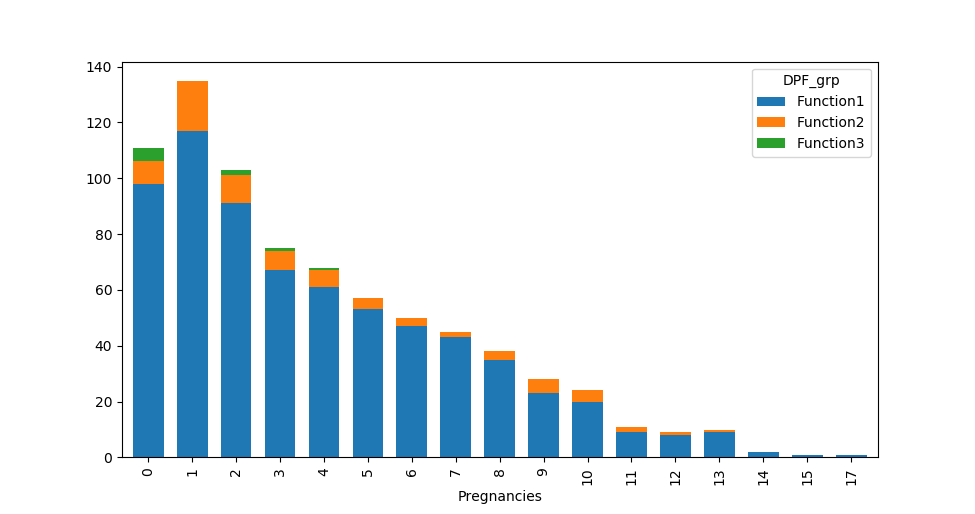

In [30]:
%matplotlib notebook
d.groupby(['Pregnancies','DPF_grp']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

<IPython.core.display.Javascript object>


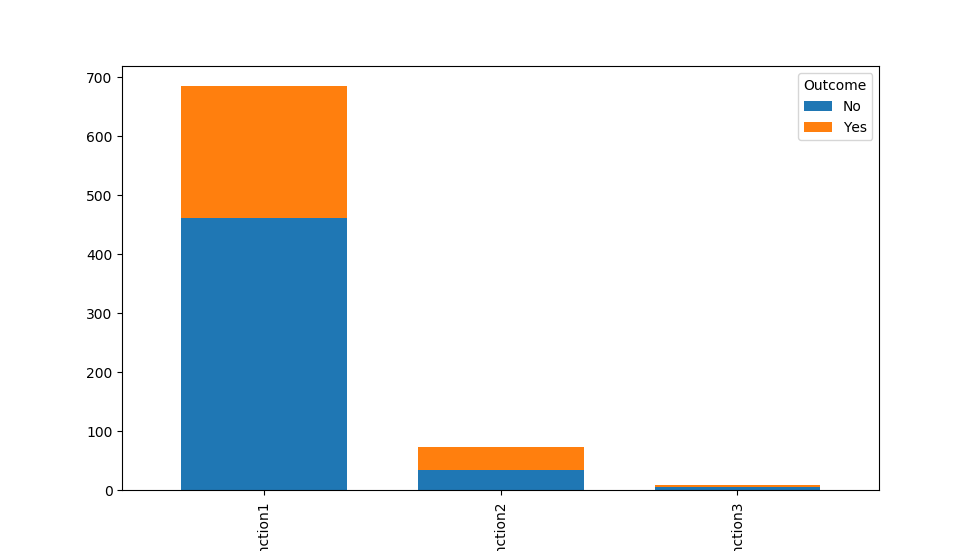

In [31]:
%matplotlib notebook
d.groupby(['DPF_grp','Outcome']).size().unstack().plot(kind='bar',stacked=True, width=0.7)
plt.show()

==> Basis Data visualization, most of the records fall under Lot1 DPF value. The reason could be that patients recorded were low on DPF scores (basis their family history). There are some records with value recorded as 0 but I will keep them as it is.

# Creating a baseline Classification Model

-- Splitting the data into train and test

In [8]:
X = d_data.drop(['Outcome'], axis=1)
y = d_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

## Logistic Regression

In [9]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)

print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.83       147
           1       0.73      0.55      0.63        84

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Random Forest Classifier

In [10]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       147
           1       0.72      0.57      0.64        84

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision – What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

TP / True Positive: when a case was positive and predicted positive
FP / False Positive: when a case was negative but predicted positive

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall – What percent of the positive cases did you catch? 
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

FN / False Negative: when a case was positive but predicted negative

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

F1 score – What percent of positive predictions were correct? 
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [11]:
# writing the baseline results to csv file 
  
# field names 
fields = ['Expt No','Outlier Treatment','Skewness Treatment','Null Treatment','Feature Selected','Model Used',
          'Weighed Precision','Weighed Recall','Weighed f1 score'] 
  
# data rows of csv file 
rows = [[1,'No','No','No',8,'Logistic Regression Baseline',precision_score(y_test,lg_pred,average='weighted'),
         recall_score(y_test,lg_pred,average='weighted'),
         f1_score(y_test,lg_pred,average='weighted')],
        [2,'No','No','No',8,'Random Forest Classifier Baseline',precision_score(y_test,rfc_pred,average='weighted'),
         recall_score(y_test,rfc_pred,average='weighted'),
         f1_score(y_test,rfc_pred,average='weighted')]]
  
# name of csv file 
filename = "/Users/pritigirishvankudre/Day7_BasicML/diabetese/score_dashboard.csv"
  
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
      
    # writing the fields 
    csvwriter.writerow(fields) 
      
    # writing the data rows 
    csvwriter.writerows(rows)

# Data Preprocessing

-- Understanding the Outliers

In [12]:
# To identify outliers in the dataset

def get_outliers(self):
        a_list = []
        per_75 = np.percentile(self,75)
        per_25 = np.percentile(self,25)
        iqr = per_75-per_25
        tot_75 = per_75 + (1.5*iqr)
        tot_25 = per_25 - (1.5*iqr)
        a_list1 = np.array(self).tolist()
        for j in a_list1:
            if j > tot_75:
                a_list.append(j)
            if j < tot_25:
                a_list.append(j)
        return a_list

for i in d_data:
    outliers = get_outliers(d_data[i])
    print ("Total outliers in Column",d_data[i].name," =",len(outliers))
    print ("Percentatge of outliers in Column",d_data[i].name," =",round(((len(outliers)/d_data.shape[0])*100),2))
    print ("** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **")

Total outliers in Column Pregnancies  = 4
Percentatge of outliers in Column Pregnancies  = 0.52
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column Glucose  = 5
Percentatge of outliers in Column Glucose  = 0.65
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column BloodPressure  = 45
Percentatge of outliers in Column BloodPressure  = 5.86
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column SkinThickness  = 1
Percentatge of outliers in Column SkinThickness  = 0.13
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column Insulin  = 34
Percentatge of outliers in Column Insulin  = 4.43
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column BMI  = 19
Percentatge of outliers in Column BMI  = 2.47
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **
Total outliers in Column DiabetesPedigreeFunction  = 29
Percentatge of outliers in Column DiabetesPedigreeFunction  = 3.78
** ** ** ** ** *

-- Visualizing outliers with boxplot

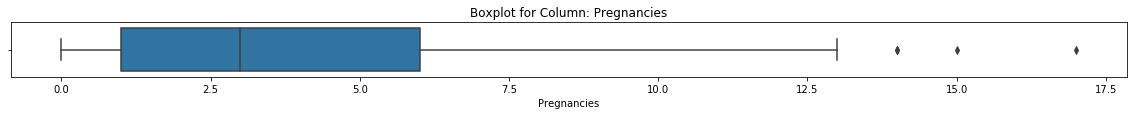

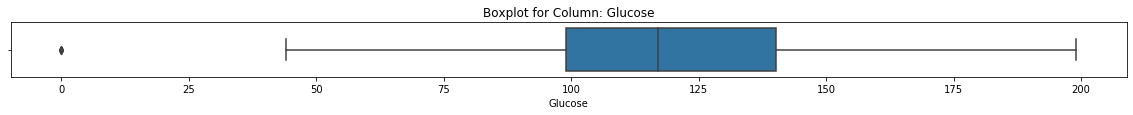

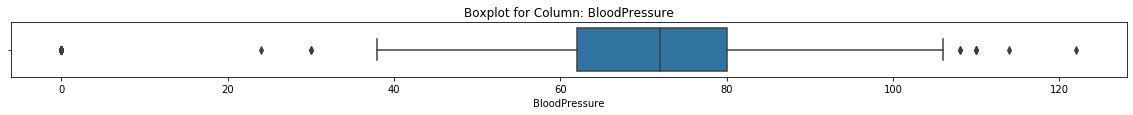

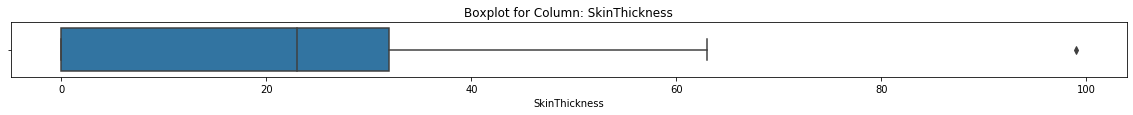

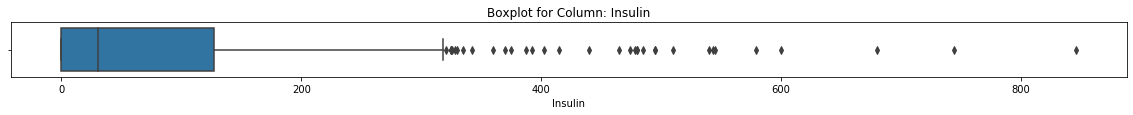

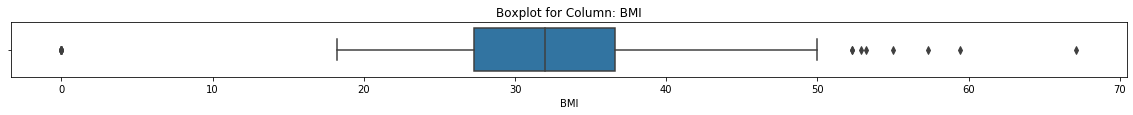

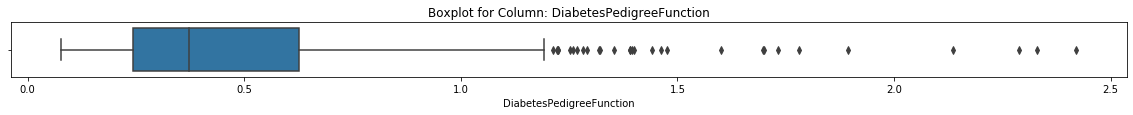

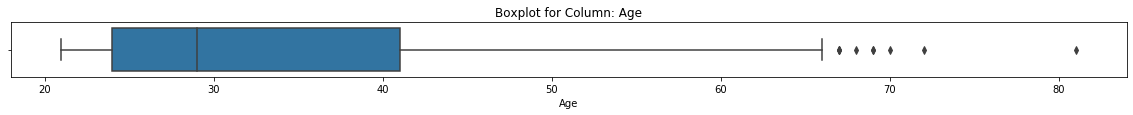

In [13]:
def visualisation(column_1):
    plt.figure(figsize=(20,1))
    plt.title("Boxplot for Column: "+column_1.name)
    sns.boxplot(column_1)
    plt.show()

for i in X:
    visualisation(X[i])

1. Pregnancies : There could be instances of child marriage/early age marriage and could expect higher number pf pregnancies reported with a patient. No Outlier treatment.

2. Glucose : Glucose outliers with value as 0, needs to be replaced with a random value between 70 and 140 (normal range) if Outcome is 0 else between 141 and 199 if Outcome is 1.

3. Blood Pressure : Outliers on a higher level can be expected. Lower side outliers to be treated with a random value between 60 and 90.

4. Skin Thickness : Anything beyond 63 mm and less than 10 mm to be treated with random value between 15 and 45 mm.

5. Insulin : Anything below 111 and beyond 1200 to be treated as outlier and treated with random value between 111 and 1200.

6. BMI : Outliers with value as 0, to be treated with mean of the sample value.

7. Diabetese Pedigree Function : I will keep outliers as it is with 0 being no history/no history available.

8. Age : I will keep outliers in age section as it is.

In [14]:
# Glucose : Glucose outliers with value as 0, needs to be replaced with a random value between 70 and 140 (normal range) if Outcome is 0 else between 141 and 199 if Outcome is 1.

for j in d_data[(d_data['Outcome'] == 0) & (d_data['Glucose'] == 0)]['Glucose'].index:
    d_data['Glucose'][j] = np.random.randint(70,140)

for j in d_data[(d_data['Outcome'] == 1) & (d_data['Glucose'] == 0)]['Glucose'].index:
    d_data['Glucose'][j] = np.random.randint(141,199)
               
print (np.sort(d_data['Glucose'].unique()))

[ 44  56  57  61  62  65  67  68  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 186 187 188 189
 190 191 193 194 195 196 197 198 199]


/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
# Blood Pressure : Outliers on a higher level can be expected. Lower side outliers to be treated with a random value between 60 and 90.

for j in d_data[(d_data['Outcome'] == 0) & (d_data['BloodPressure'] < 24)]['BloodPressure'].index:
    d_data['BloodPressure'][j] = np.random.randint(60,90)

for j in d_data[(d_data['Outcome'] == 1) & (d_data['BloodPressure'] < 24)]['BloodPressure'].index:
    d_data['BloodPressure'][j] = np.random.randint(90,122)
        
print (np.sort(d_data['BloodPressure'].unique()))

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


[ 24  30  38  40  44  46  48  50  52  54  55  56  58  60  61  62  63  64
  65  66  67  68  70  71  72  74  75  76  78  79  80  81  82  83  84  85
  86  88  90  91  92  94  95  96  97  98 100 102 104 105 106 107 108 110
 112 114 115 120 121 122]


In [16]:
# Skin Thickness : Anythhing beyond 63 mm and less than 10 mm to be treated with random value between 15 and 45 mm.

for j in d_data[(d_data['Outcome'] == 0) & (d_data['SkinThickness'] < 10)]['SkinThickness'].index:
    d_data['SkinThickness'][j] = np.random.randint(15,45)

for j in d_data[(d_data['Outcome'] == 0) & (d_data['SkinThickness'] > 63)]['SkinThickness'].index:
    d_data['SkinThickness'][j] = np.random.randint(15,45)
    
for j in d_data[(d_data['Outcome'] == 1) & (d_data['SkinThickness'] < 10)]['SkinThickness'].index:
    d_data['SkinThickness'][j] = np.random.randint(46,60)

for j in d_data[(d_data['Outcome'] == 1) & (d_data['SkinThickness'] > 63)]['SkinThickness'].index:
    d_data['SkinThickness'][j] = np.random.randint(46,60)
        
print (np.sort(d_data['SkinThickness'].unique()))

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 63]


/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [17]:
# Insulin : Anything below 111 and beyond 1200 to be treated as outlier and treated with random value between 111 and 1200.

for j in d_data[d_data['Insulin'] < 111]['Insulin'].index:
    d_data['Insulin'][j] = np.random.randint(111,1200)

for j in d_data[d_data['Insulin'] > 1200]['Insulin'].index:
    d_data['Insulin'][j] = np.random.randint(111,1200)        
        
print (np.sort(d_data['Insulin'].unique()))

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[ 111  112  113  114  115  116  119  120  122  123  125  126  127  128
  129  130  132  135  137  140  142  143  144  145  146  148  150  152
  155  156  158  159  160  161  163  164  165  166  167  168  170  171
  172  175  176  177  178  180  181  182  183  184  185  188  189  190
  191  192  193  194  196  198  200  201  204  205  207  209  210  212
  215  217  220  224  225  226  228  230  231  235  237  239  240  245
  249  250  251  255  256  257  258  259  262  265  266  267  269  270
  271  272  273  274  275  276  277  278  279  280  282  283  284  285
  286  287  291  293  296  299  300  302  303  304  305  306  310  311
  313  315  318  319  321  325  326  328  329  330  332  333  334  335
  336  339  341  342  345  348  351  353  356  360  363  364  367  370
  374  375  386  387  388  391  392  395  400  402  409  413  415  416
  420  421  424  428  429  431  432  436  437  439  440  441  443  445
  446  448  455  457  459  461  462  464  465  472  474  478  480  483
  484 

In [18]:
# BMI : Outliers with value as 0, to be treated with mean of the sample value.

for j in d_data[d_data['BMI'] == 0]['BMI'].index:
    d_data['BMI'][j] = round(np.mean(d_data['BMI']),1)        
        
print (np.sort(d_data['BMI'].unique()))

/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[18.2 18.4 19.1 19.3 19.4 19.5 19.6 19.9 20.  20.1 20.4 20.8 21.  21.1
 21.2 21.7 21.8 21.9 22.1 22.2 22.3 22.4 22.5 22.6 22.7 22.9 23.  23.1
 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1 24.2 24.3 24.4 24.5
 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4 25.5 25.6 25.8 25.9 26.
 26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9 27.  27.1 27.2 27.3 27.4
 27.5 27.6 27.7 27.8 27.9 28.  28.1 28.2 28.3 28.4 28.5 28.6 28.7 28.8
 28.9 29.  29.2 29.3 29.5 29.6 29.7 29.8 29.9 30.  30.1 30.2 30.3 30.4
 30.5 30.7 30.8 30.9 31.  31.1 31.2 31.3 31.6 31.9 32.  32.1 32.2 32.3
 32.4 32.5 32.6 32.7 32.8 32.9 33.1 33.2 33.3 33.5 33.6 33.7 33.8 33.9
 34.  34.1 34.2 34.3 34.4 34.5 34.6 34.7 34.8 34.9 35.  35.1 35.2 35.3
 35.4 35.5 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3 36.4 36.5 36.6 36.7
 36.8 36.9 37.  37.1 37.2 37.3 37.4 37.5 37.6 37.7 37.8 37.9 38.  38.1
 38.2 38.3 38.4 38.5 38.6 38.7 38.8 38.9 39.  39.1 39.2 39.3 39.4 39.5
 39.6 39.7 39.8 39.9 40.  40.1 40.2 40.5 40.6 40.7 40.8 40.9 41.  41.2
 41.3 4

# To check on skewness

-- If skewness is less than -1 or greater than 1, the distribution is highly skewed.

-- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

-- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [19]:
d_data.skew(axis = 0)

Pregnancies                 0.901674
Glucose                     0.527358
BloodPressure               0.404390
SkinThickness               0.394255
Insulin                     0.372158
BMI                         0.599842
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

-- Since the outlier treament is not done on Age to keep genuine outliers and since I do not have domain knowledge on Diabetes Pedigree Function, will keep the skewness untreated for these two columns. Rest other columns are approximately syammetric.

# Skipping Feature Engineering for now as it seems columns are integer and hold values distributed across a wide range

# Skipping explicit feature selection but will use RFE to do feature selection while model building

In [20]:
for i in d_data:
    print ('Min and Max value for column =',i)
    print (d_data[i].min(),'and',d_data[i].max())
    print ('===================================')

Min and Max value for column = Pregnancies
0 and 17
Min and Max value for column = Glucose
44 and 199
Min and Max value for column = BloodPressure
24 and 122
Min and Max value for column = SkinThickness
10 and 63
Min and Max value for column = Insulin
111 and 1197
Min and Max value for column = BMI
18.2 and 67.1
Min and Max value for column = DiabetesPedigreeFunction
0.078 and 2.42
Min and Max value for column = Age
21 and 81
Min and Max value for column = Outcome
0 and 1


# Classification Model with RFE for Feature selection

-- Splitting the data in train and test

In [21]:
X1 = d_data.drop(['Outcome'], axis=1)
y1 = d_data['Outcome']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7, random_state=7)

# Logistic Regression with all 8 Features selected

In [22]:
lg1 = LogisticRegression()
lg1.fit(X1_train,y1_train)
lg_pred_1 = lg1.predict(X1_test)

print(classification_report(y1_test,lg_pred_1))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       147
           1       0.72      0.68      0.70        84

    accuracy                           0.79       231
   macro avg       0.77      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forrest Classifier with all 8 Features selected

In [23]:
rfc1 = RandomForestClassifier()
rfc1.fit(X1_train,y1_train)
rfc_pred_1 = rfc1.predict(X1_test)

print(classification_report(y1_test,rfc_pred_1))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       147
           1       0.82      0.60      0.69        84

    accuracy                           0.81       231
   macro avg       0.81      0.76      0.77       231
weighted avg       0.81      0.81      0.80       231



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
# writing the results to csv file 
  
# field names 
fields = ['Expt No','Outlier Treatment','Skewness Treatment','Null Treatment','Feature Selected','Model Used',
          'Weighed Precision','Weighed Recall','Weighed f1 score'] 
  
# data rows of csv file 
rows = [[3,'Yes','Yes','Yes',8,'Logistic Regression',precision_score(y1_test,lg_pred_1,average='weighted'),
         recall_score(y1_test,lg_pred_1,average='weighted'),
         f1_score(y1_test,lg_pred_1,average='weighted')],
        [4,'Yes','Yes','Yes',8,'Random Forest Classifier',precision_score(y1_test,rfc_pred_1,average='weighted'),
         recall_score(y1_test,rfc_pred_1,average='weighted'),
         f1_score(y1_test,rfc_pred_1,average='weighted')]]
  
# name of csv file 
filename = "/Users/pritigirishvankudre/Day7_BasicML/diabetese/score_dashboard.csv"
  
# writing to csv file 
with open(filename, 'a') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
      
    # writing the data rows 
    csvwriter.writerows(rows)

# Logistic Regression with 5 top features selected using RFE

In [27]:
# Use RFE for feature selection for Logistic Regression Algorithm

lg2 = LogisticRegression()
rfe = RFE(lg2,5)
rfe.fit(X1, y1)

# Selecting top 5 columns

sel_cols = []
for a, b, c in zip(rfe.support_, rfe.ranking_, X1.columns):
    if b == 1:
        sel_cols.append(c)
print ('Columns Selected are ::',sel_cols)

# Creating new DataFrame with selected columns only as X

X_sel = X1[sel_cols]

# Split data in to train and test

X2_train, X2_test, y2_train, y2_test = train_test_split(X_sel, y1, train_size=0.7, random_state=7)
lg2.fit(X2_train, y2_train)
lg_pred_2 = lg2.predict(X2_test)

print(classification_report(y2_test,lg_pred_2))

Columns Selected are :: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       147
           1       0.72      0.67      0.69        84

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/lo

# Random Forest Classifier with 5 top features selected using RFE

In [28]:
# Use RFE for feature selection for Random Forest Classifier Algorithm

rfc2 = RandomForestClassifier()
rfe = RFE(rfc2,5)
rfe.fit(X1, y1)

# Selecting top 5 columns

sel_cols = []
for a, b, c in zip(rfe.support_, rfe.ranking_, X1.columns):
    if b == 1:
        sel_cols.append(c)
print ('Columns Selected are ::',sel_cols)

# Creating new DataFrame with selected columns only as X

X_sel = X1[sel_cols]

# Split data in to train and test

X2_train, X2_test, y2_train, y2_test = train_test_split(X_sel, y1, train_size=0.7, random_state=7)
rfc2.fit(X2_train, y2_train)
rfc_pred_2 = rfc2.predict(X2_test)

print(classification_report(y2_test,rfc_pred_2))

Columns Selected are :: ['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       147
           1       0.75      0.63      0.68        84

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

# Logistic Regression with 3 top features selected using RFE

In [29]:
# Use RFE for feature selection for Logistic Regression Algorithm

lg3 = LogisticRegression()
rfe = RFE(lg3,3)
rfe.fit(X1, y1)

# Selecting top 3 columns

sel_cols = []
for a, b, c in zip(rfe.support_, rfe.ranking_, X1.columns):
    if b == 1:
        sel_cols.append(c)
print ('Columns Selected are ::',sel_cols)

# Creating new DataFrame with selected columns only as X

X_sel = X1[sel_cols]

# Split data in to train and test

X2_train, X2_test, y2_train, y2_test = train_test_split(X_sel, y1, train_size=0.7, random_state=7)
lg3.fit(X2_train, y2_train)
lg_pred_3 = lg3.predict(X2_test)

print(classification_report(y2_test,lg_pred_3))

Columns Selected are :: ['Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction']
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       147
           1       0.68      0.51      0.59        84

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/lo

# Random Forest Classifier with 3 top features selected using RFE

In [30]:
# Use RFE for feature selection for Random Forest Classifier Algorithm

rfc3 = RandomForestClassifier()
rfe = RFE(rfc3,3)
rfe.fit(X1, y1)

# Selecting top 3 columns

sel_cols = []
for a, b, c in zip(rfe.support_, rfe.ranking_, X1.columns):
    if b == 1:
        sel_cols.append(c)
print ('Columns Selected are ::',sel_cols)

# Creating new DataFrame with selected columns only as X

X_sel = X1[sel_cols]

# Split data in to train and test

X2_train, X2_test, y2_train, y2_test = train_test_split(X_sel, y1, train_size=0.7, random_state=7)
rfc3.fit(X2_train, y2_train)
rfc_pred_3 = rfc3.predict(X2_test)

print(classification_report(y2_test,rfc_pred_3))

Columns Selected are :: ['Glucose', 'SkinThickness', 'BMI']
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       147
           1       0.76      0.61      0.68        84

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pritigirishvankudre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

In [31]:
# writing the results to csv file 
  
# field names 
fields = ['Expt No','Outlier Treatment','Skewness Treatment','Null Treatment','Feature Selected','Model Used',
          'Weighed Precision','Weighed Recall','Weighed f1 score'] 
  
# data rows of csv file 
rows = [[5,'Yes','Yes','Yes',5,'Logistic Regression',precision_score(y2_test,lg_pred_2,average='weighted'),
         recall_score(y2_test,lg_pred_2,average='weighted'),
         f1_score(y2_test,lg_pred_2,average='weighted')],
        [6,'Yes','Yes','Yes',5,'Random Forest Classifier',precision_score(y2_test,rfc_pred_2,average='weighted'),
         recall_score(y2_test,rfc_pred_2,average='weighted'),
         f1_score(y2_test,rfc_pred_2,average='weighted')],
        [7,'Yes','Yes','Yes',3,'Logistic Regression',precision_score(y2_test,lg_pred_3,average='weighted'),
         recall_score(y2_test,lg_pred_3,average='weighted'),
         f1_score(y2_test,lg_pred_3,average='weighted')],
        [8,'Yes','Yes','Yes',3,'Random Forest Classifier',precision_score(y2_test,rfc_pred_3,average='weighted'),
         recall_score(y2_test,rfc_pred_3,average='weighted'),
         f1_score(y2_test,rfc_pred_3,average='weighted')]]
  
# name of csv file 
filename = "/Users/pritigirishvankudre/Day7_BasicML/diabetese/score_dashboard.csv"
  
# writing to csv file 
with open(filename, 'a') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
      
    # writing the data rows 
    csvwriter.writerows(rows)